In [2]:
import sys
sys.path.append('/Users/yuch8913/miniforge3/envs/er3t_env/lib/python3.8/site-packages')
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
from glob import glob
import numpy as np
from sys import exit as ext
import copy
from bisect import bisect_left
from oco_post_class_ywc import *
from matplotlib import cm
from scipy.interpolate import interpn
from scipy import stats
import geopy.distance
import xarray as xr
import seaborn as sns
%matplotlib inline
import os, pickle 
#"""

from matplotlib import font_manager

font_path = '/System/Library/Fonts/Supplemental/Arial.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#"""

import warnings
warnings.filterwarnings("ignore")

In [4]:
f_abs = h5py.File('data/20181018_central_asia_2_470cloud_test2_20181018/atm_abs_wco2_11.h5', 'r')

In [71]:
f_abs = h5py.File('data/atm_abs_o2a_11.h5', 'r')

In [72]:
absgl = f_abs['absgl'][...]
absgn = f_abs['absgn'][...]
absgx = f_abs['absgx'][...]
absgy = f_abs['absgy'][...]

print('absgl shape:', absgl.shape)
print('absgn shape:', absgn.shape)
print('absgx shape:', absgx.shape)
print('absgy shape:', absgy.shape)

absgl shape: (29, 11, 137)
absgn shape: (11,)
absgx shape: (11, 137)
absgy shape: (11, 137)


In [77]:
lam_ind = 5
z = 0
absgx[lam_ind, :absgn[lam_ind]]

array([0.76312518, 0.7631246 , 0.76312402, 0.76312343, 0.76312285,
       0.76312227, 0.76312169, 0.7631211 , 0.76312052, 0.76311994,
       0.76311936, 0.76311877, 0.76311819, 0.76311761, 0.76311703,
       0.76311645, 0.76311586, 0.76311528, 0.7631147 , 0.76311412,
       0.76311353, 0.76311295, 0.76311237, 0.76311179, 0.7631112 ,
       0.76311062, 0.76311004, 0.76310946, 0.76310888, 0.76310829,
       0.76310771, 0.76310713, 0.76310655, 0.76310596, 0.76310538,
       0.7631048 , 0.76310422, 0.76310363, 0.76310305, 0.76310247,
       0.76310189, 0.7631013 , 0.76310072, 0.76310014, 0.76309956,
       0.76309898, 0.76309839, 0.76309781, 0.76309723, 0.76309665,
       0.76309606, 0.76309548, 0.7630949 , 0.76309432, 0.76309373,
       0.76309315, 0.76309257, 0.76309199, 0.76309141, 0.76309082,
       0.76309024, 0.76308966, 0.76308908, 0.76308849, 0.76308791,
       0.76308733, 0.76308675, 0.76308616, 0.76308558, 0.763085  ,
       0.76308442, 0.76308384, 0.76308325, 0.76308267, 0.76308

In [78]:
absgy[lam_ind, :absgn[lam_ind]]

array([0.05841959, 0.06202233, 0.06602033, 0.07047221, 0.07535805,
       0.08064313, 0.08654799, 0.09290875, 0.0998459 , 0.10711939,
       0.11542896, 0.12447516, 0.13460792, 0.14535245, 0.15740057,
       0.17002052, 0.18364578, 0.19760542, 0.21346839, 0.23013415,
       0.24844988, 0.26729055, 0.28786087, 0.30882659, 0.33007577,
       0.35208075, 0.37685084, 0.40065002, 0.42604035, 0.45167669,
       0.47831858, 0.50503304, 0.53057585, 0.55610429, 0.58279757,
       0.60956409, 0.63566678, 0.66171895, 0.68688616, 0.71179597,
       0.7344834 , 0.75654381, 0.77939175, 0.7993562 , 0.81863301,
       0.83828169, 0.85545302, 0.87245568, 0.88706452, 0.90095045,
       0.91443557, 0.92584513, 0.93653851, 0.94675819, 0.95551178,
       0.96354616, 0.97006313, 0.97637443, 0.98205236, 0.9863988 ,
       0.99023692, 0.99330912, 0.99594455, 0.9978138 , 0.99912579,
       0.99986045, 0.99998249, 0.99967589, 0.99884734, 0.99741432,
       0.99546125, 0.99296014, 0.98979059, 0.98632318, 0.98203

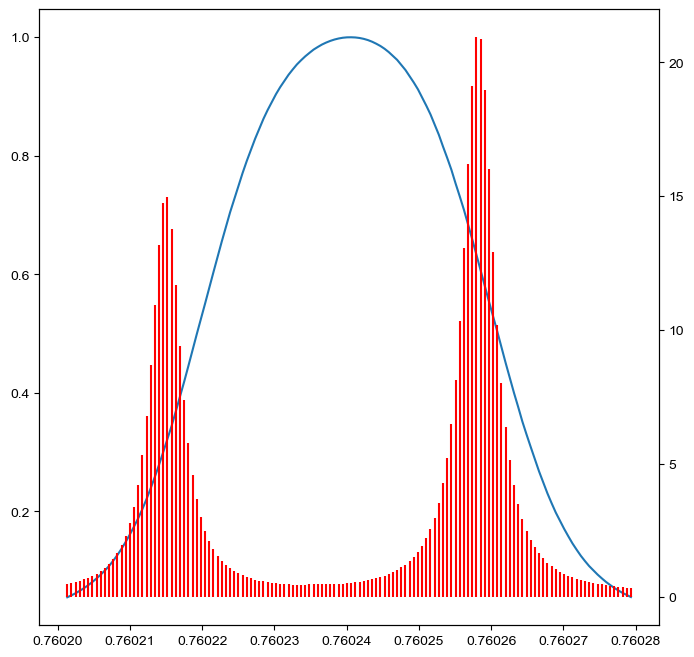

In [144]:
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()



ax1.plot(absgx[lam_ind, :absgn[lam_ind]], absgy[lam_ind, :absgn[lam_ind]])
ax2.vlines(absgx[lam_ind, :absgn[lam_ind]], 0 , absgl[z, lam_ind, :absgn[lam_ind]], 'r')

In [145]:
sort_ind = np.argsort(absgl[z, lam_ind, :absgn[lam_ind]])

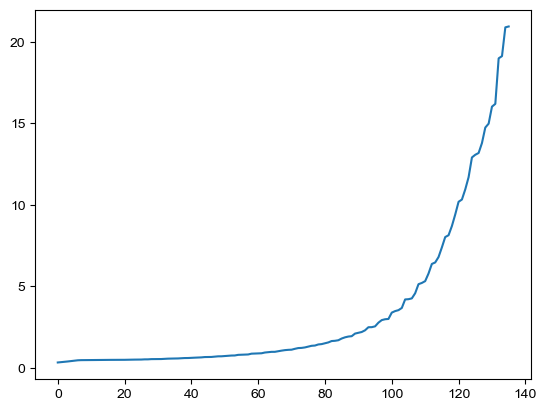

In [146]:
plt.plot((absgl[z, lam_ind, :absgn[lam_ind]])[sort_ind])

In [82]:
x_sort = np.arange(len(sort_ind))+1
prob = x_sort/np.max(x_sort)
prob

array([0.00740741, 0.01481481, 0.02222222, 0.02962963, 0.03703704,
       0.04444444, 0.05185185, 0.05925926, 0.06666667, 0.07407407,
       0.08148148, 0.08888889, 0.0962963 , 0.1037037 , 0.11111111,
       0.11851852, 0.12592593, 0.13333333, 0.14074074, 0.14814815,
       0.15555556, 0.16296296, 0.17037037, 0.17777778, 0.18518519,
       0.19259259, 0.2       , 0.20740741, 0.21481481, 0.22222222,
       0.22962963, 0.23703704, 0.24444444, 0.25185185, 0.25925926,
       0.26666667, 0.27407407, 0.28148148, 0.28888889, 0.2962963 ,
       0.3037037 , 0.31111111, 0.31851852, 0.32592593, 0.33333333,
       0.34074074, 0.34814815, 0.35555556, 0.36296296, 0.37037037,
       0.37777778, 0.38518519, 0.39259259, 0.4       , 0.40740741,
       0.41481481, 0.42222222, 0.42962963, 0.43703704, 0.44444444,
       0.45185185, 0.45925926, 0.46666667, 0.47407407, 0.48148148,
       0.48888889, 0.4962963 , 0.5037037 , 0.51111111, 0.51851852,
       0.52592593, 0.53333333, 0.54074074, 0.54814815, 0.55555

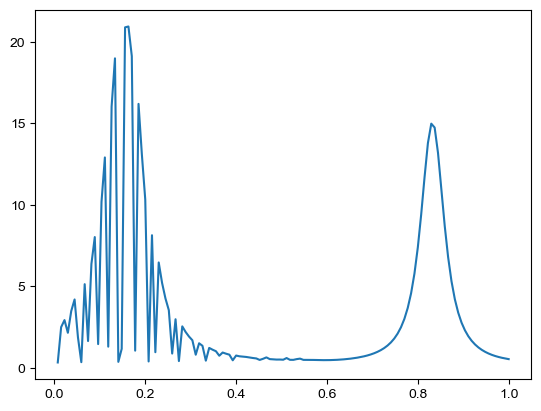

In [143]:
plt.plot(prob, (absgl[z, lam_ind, :absgn[lam_ind]])[sort_ind])


ValueError: x and y must have same first dimension, but have shapes (135,) and (136,)

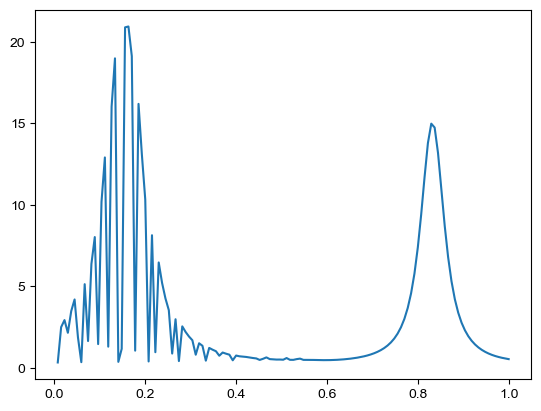

In [142]:
y = (absgl[z, lam_ind, :absgn[lam_ind]])*absgy[lam_ind, :absgn[lam_ind]]
sort_w_weight_ind = np.argsort(y)
plt.plot(prob, (absgl[z, lam_ind, :absgn[lam_ind]])[sort_ind], label='without weight')
plt.plot(prob, y[sort_w_weight_ind], label='with weight')
plt.legend()

In [85]:
import bisect

In [98]:
g = 64
prob_select = np.linspace(prob[0], prob[-1], g)
select_ind = np.zeros(g, dtype=int)
for i in range(g):
    select_ind[i] = np.argmin(np.abs(prob-prob_select[i]))

In [99]:
select_ind

array([  0,   2,   4,   6,   9,  11,  13,  15,  17,  19,  21,  23,  26,
        28,  30,  32,  34,  36,  38,  40,  43,  45,  47,  49,  51,  53,
        55,  57,  60,  62,  64,  66,  68,  70,  72,  74,  77,  79,  81,
        83,  85,  87,  89,  91,  94,  96,  98, 100, 102, 104, 106, 108,
       111, 113, 115, 117, 119, 121, 123, 125, 128, 130, 132, 134])

In [137]:
lam_ind = 10

In [138]:
np.sum(y[sort_w_weight_ind])/np.sum(absgy[lam_ind, :absgn[lam_ind]])

0.058103109455806386

In [139]:
a = np.sum((absgl[z, lam_ind, :absgn[lam_ind]])*absgy[lam_ind, :absgn[lam_ind]])/np.sum(absgy[lam_ind, :absgn[lam_ind]])
a

3.121920751533824

In [140]:
y = (absgl[z, lam_ind, :absgn[lam_ind]])*absgy[lam_ind, :absgn[lam_ind]]
sort_w_weight_ind = np.argsort(y)
b = np.sum((y[sort_w_weight_ind])[select_ind])/np.sum(absgy[lam_ind, :absgn[lam_ind]][sort_w_weight_ind][select_ind])
b

2.9223338932084175

In [141]:
b/a

0.9360692105245312